## Travelling Salesman in Fruitland

The salesman has just arrived at Fruitland International Airport and has no time to waste. From there, he has to visit each of the 17 cities of Fruitland only once and, at the end of the trip, return to the airport.

In order to reduce the time on the road to a minimum, he needs to optimize his itinerary, which should be as short as possible.

In [1]:
import mosa
from numpy.random import seed, uniform
from math import sqrt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
seed(0)

The (x,y) coordinates of the 17 cities are generated by the *generate_data* function below.

In [3]:
list_of_cities = [
    "Apple City",
    "Banana City",
    "Strawberry City",
    "BlueBerry City",
    "Pineapple City",
    "Blackberry City",
    "Kiwi City",
    "Cherry City",
    "Star Fruit City",
    "Passion Fruit City",
    "Avocado City",
    "Pomegranate City",
    "Orange City",
    "Lemon City",
    "Tangerine City",
    "Pear City",
    "Tomato City",
]


def generate_data():
    maxcoord: float = 20.0
    Cities: dict = {"Airport": (0.0, 0.0)}

    for city in list_of_cities:
        Cities[city] = (uniform(0.0, maxcoord), uniform(0.0, maxcoord))

    return Cities


cities = generate_data()

### Translating the travelling salesman problem into Python code

A Python function *fobj* implements the optimization problem. 

The solution to the problem is *Stops*, which is a list of the names of the cities in Fruitland that the salesman must visit in a specific order.

Since this is a single-objective optimization problem, *fobj* returns a single value, which is the total distance traveled by the salesman if he visits each city in the order they appear in the solution.

In [4]:
def fobj(Stops: list) -> tuple:
    coords1 = cities["Airport"]
    coords2 = cities[Stops[0]]
    total_dist = sqrt((coords2[0] - coords1[0]) ** 2 + (coords2[1] - coords1[1]) ** 2)

    for i in range(1, len(Stops)):
        coords1 = cities[Stops[i - 1]]
        coords2 = cities[Stops[i]]
        total_dist += sqrt(
            (coords2[0] - coords1[0]) ** 2 + (coords2[1] - coords1[1]) ** 2
        )

    coords1 = cities[Stops[-1]]
    coords2 = cities["Airport"]
    total_dist += sqrt((coords2[0] - coords1[0]) ** 2 + (coords2[1] - coords1[1]) ** 2)

    return (total_dist,)

### Initialization

In [5]:
opt = mosa.Anneal()

--------------------------------------------------
 MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA) 0.8.5  
--------------------------------------------------


In [6]:
opt.set_population(Stops=list_of_cities)

In [7]:
opt.initial_temperature = 10.0
opt.number_of_temperatures = 100
opt.number_of_iterations = 1000
opt.archive_size = 100
opt.maximum_archive_rejections = 50000

In [8]:
opt.set_group_params(
    "Stops",
    number_of_elements=len(list_of_cities),
    distinct_elements=True,
    change_value_move=0.0,
    swap_move=1.0,
)

### Run

In [9]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------

Groups in the solution:

    Stops:
        Number of elements: 17
        Sample space: discrete
        Size of population group: 17
        Distinct elements: True
        Selection weight: 1.0
        Weight of 'swap' trial move: 1.0
        Sort values: False
------
Initializing with a random solution from scratch...
Done!
------
Starting at temperature: 10.000000
Evolving solutions to the problem, please wait...
Too many attempts to insert a solution in the archive failed!
Stopping at temperature: 0.006962
------

--- THE END ---
CPU times: total: 40.6 s
Wall time: 43 s


### Output

The shortest route can be seen below and is around 83 units of distance. The first city to be visited is Cherry City, which is the closest city to the airport, and the last one is Orange City. The optimized route can also be vizualized on a 2D plot.

In [10]:
opt.printx()

0) Stops: [Cherry City, Tangerine City, Banana City, Blackberry City, Pineapple City, Avocado City, Passion Fruit City, Kiwi City, BlueBerry City, Pomegranate City, Apple City, Tomato City, Strawberry City, Pear City, Lemon City, Star Fruit City, Orange City] ===> [82.91878251421768]


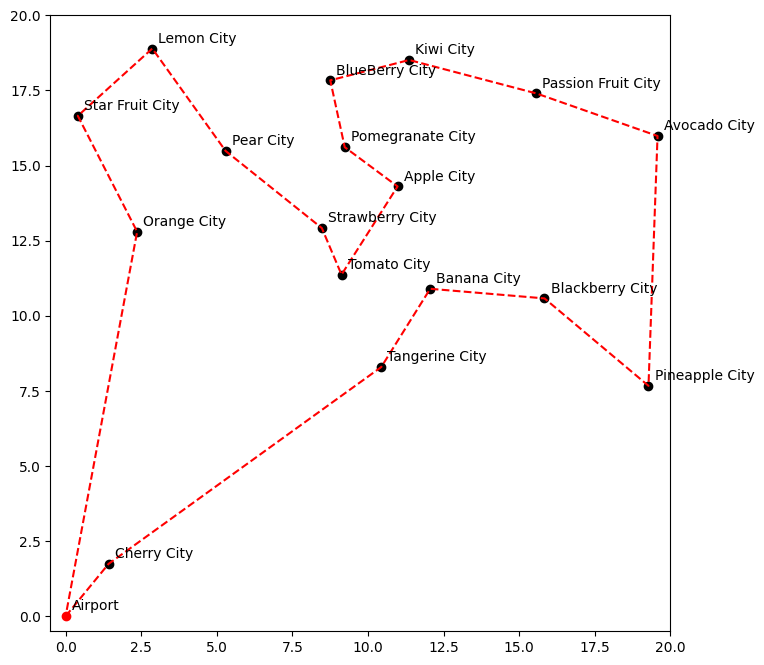

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.xlim(-0.5, 20)
plt.ylim(-0.5, 20)
ax.plot(cities["Airport"][0], cities["Airport"][1], "ro")
plt.annotate(
    "Airport",
    (cities["Airport"][0], cities["Airport"][1]),
    (cities["Airport"][0] + 0.2, cities["Airport"][1] + 0.2),
)

sol = opt.copyx()
pathx = [cities["Airport"][0]]
pathy = [cities["Airport"][1]]

for key in sol["x"][0]["Stops"]:
    ax.plot(cities[key][0], cities[key][1], "ko")
    plt.annotate(
        key,
        (cities[key][0], cities[key][1]),
        (cities[key][0] + 0.2, cities[key][1] + 0.2),
    )
    pathx.append(cities[key][0])
    pathy.append(cities[key][1])

pathx.append(cities["Airport"][0])
pathy.append(cities["Airport"][1])

plt.plot(pathx, pathy, "r--")
plt.show()